In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# CREATE DATAFRAME
df = pd.read_excel("Health Insurance Dataset.xlsx")

,age,sex,bmi,children,smoker,region,charges,Level,score
0,19,female,27.900,0,yes,southwest,16884.92400,B,72
1,18,male,33.770,1,no,southeast,1725.55230,C,69
2,28,male,33.000,3,no,southeast,4449.46200,B,90
3,33,male,22.705,0,no,northwest,21984.47061,A,47
4,32,male,28.880,0,no,northwest,3866.85520,C,76


Age statistics:
 count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


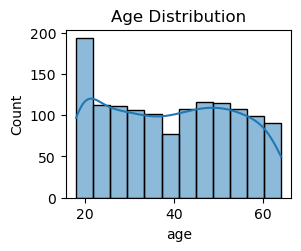

In [34]:
# AGE HISTOGRAM
plt.subplot(2, 2, 2)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
print("Age statistics:\n",df['age'].describe())

Sex Distribution:
 sex
male      676
female    662
Name: count, dtype: int64


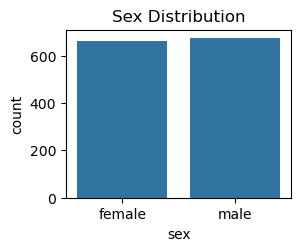

In [35]:
# SEX BAR CHART
sex_counts = df['sex'].value_counts()
plt.subplot(2, 2, 1)
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
print("Sex Distribution:\n", sex_counts)

bmi statistics:
 count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


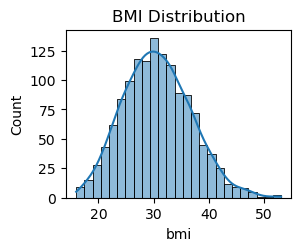

In [36]:
# BMI HISTOGRAM
plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
print("bmi statistics:\n",df['bmi'].describe())


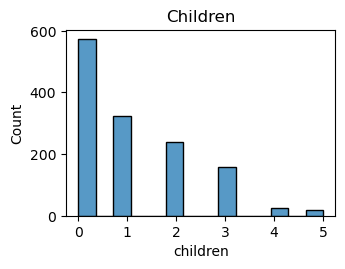

In [37]:
# CHILDREN BAR CHART
plt.subplot(2,2, 1)
sns.histplot(df['children'])
plt.title('Children')
plt.tight_layout()

Smoker Distribution:
 smoker
no     1064
yes     274
Name: count, dtype: int64


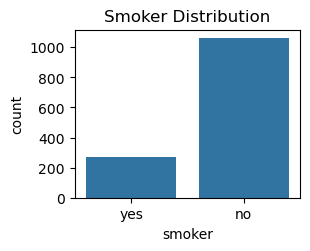

In [39]:
# SMOKER BAR CHART 
smoker_counts = df['smoker'].value_counts()
plt.subplot(2, 2, 2)
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
print("Smoker Distribution:\n", smoker_counts)

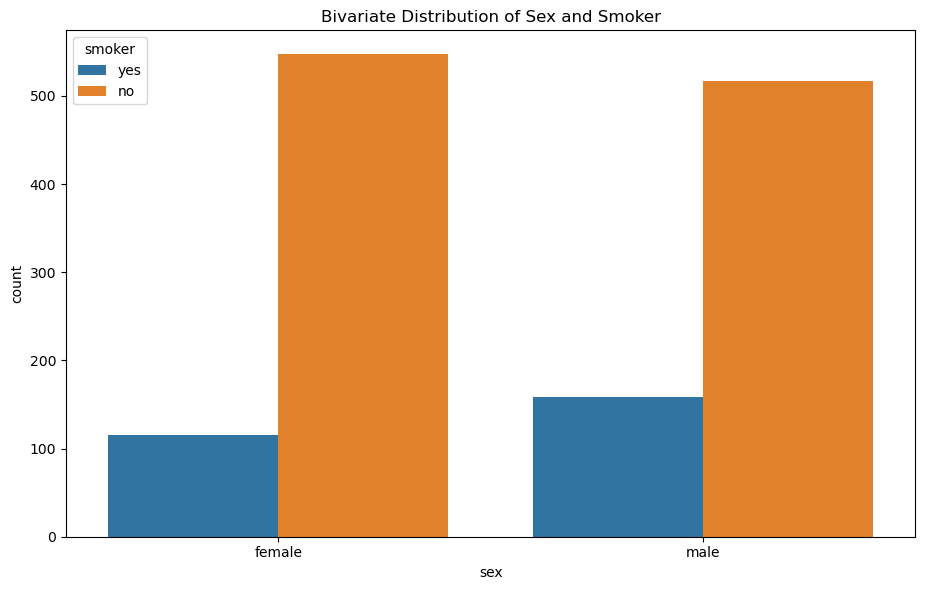

In [ ]:
# Bivariate Distribution of Sex and Smoker
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Bivariate Distribution of Sex and Smoker')
plt.tight_layout()

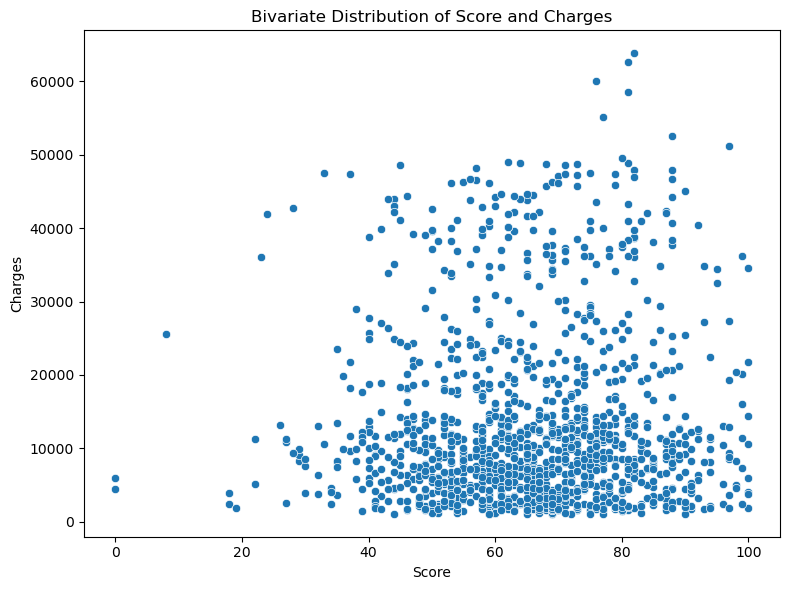

In [ ]:
# Bivariate Distribution of Score and Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='score', y='charges', data=df)
plt.title('Bivariate Distribution of Score and Charges')
plt.xlabel('Score')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

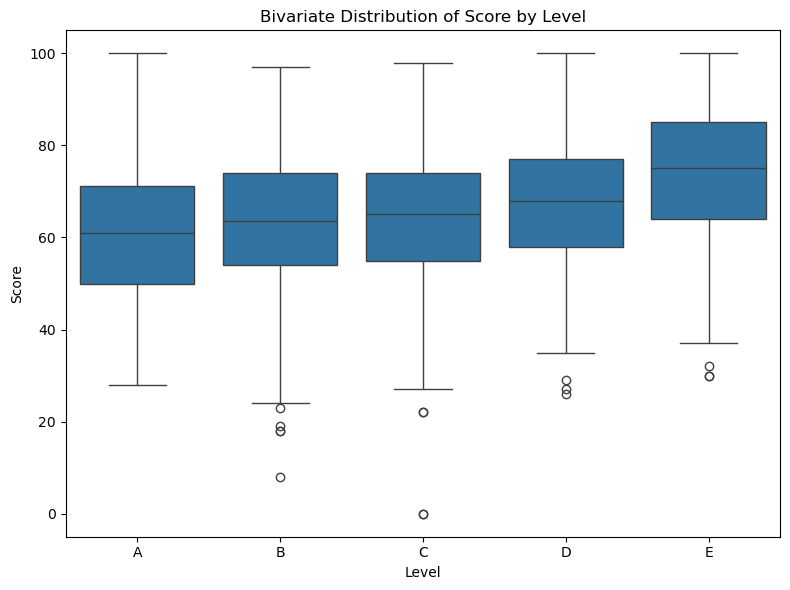

In [ ]:
# Bivariate Distribution of Score by Level
order = ['A', 'B', 'C', 'D', 'E']

plt.figure(figsize=(8, 6))
sns.boxplot(x='Level', y='score', data=df, order=order)
plt.title('Bivariate Distribution of Score by Level')
plt.xlabel('Level')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

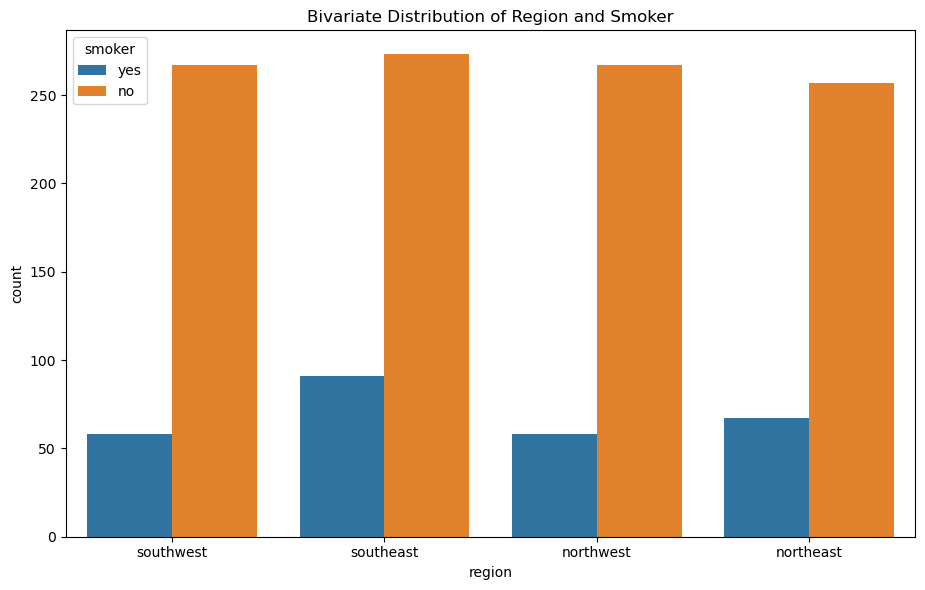

In [ ]:
# Bivariate Distribution of Region and Smoker
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 2)
sns.countplot(x='region', hue='smoker', data=df)
plt.title('Bivariate Distribution of Region and Smoker')
plt.tight_layout()
plt.tight_layout()

### How does smoking status impact healthcare expenditure of the individuals in different geographical regions and point out significant cost differences between smokers and non-smokers after adjusting the effect of other covariates such as age, BMI, and score?

In [42]:
smokers_charges = df[df['smoker'] == 'yes']['charges']
non_smokers_charges = df[df['smoker'] == 'no']['charges']
t_stat, p_value = stats.ttest_ind(smokers_charges, non_smokers_charges)
print("T-statistic:", t_stat)
print("P-value:", p_value)
# Run the code block above to get the t-statistic and p-value
# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis (H₀).")
    print("There is a significant difference in the mean healthcare charges between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis (H₀).")
    print("There is no significant difference in the mean healthcare charges between smokers and non-smokers.")


T-statistic: 46.66492117272371
P-value: 8.271435842179102e-283
Reject the null hypothesis (H₀).
There is a significant difference in the mean healthcare charges between smokers and non-smokers.
